In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf

## Data loading

In [10]:
#data preprocessing

# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = np.load(filename)
	# unpack arrays
	X1, X2 = data['x'], data['y']
	# scale from [0,255] to [-1,1]
	# X1 = (X1 - 127.5) / 127.5
	# X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [3]:
dataset = load_real_samples("E:\Jyoti Shukla - MS\Karnataka Dataset\Satellite Data for composite\paired_arrays_train_total_AVHRR_data.npz")
dataset_test = load_real_samples('E:\Jyoti Shukla - MS\Karnataka Dataset\Satellite Data for composite\paired_arrays_test_total_AVHRR_data.npz')
train_dataset, train_labels = dataset[0],dataset[1]
test_dataset, test_labels = dataset_test[0], dataset_test[1]
# Inspect the dataset.
print("Training Dataset Shapes: " + str(train_dataset.shape) + ", " + str(train_labels.shape))
print("Validation Dataset Shapes: " + str(test_dataset.shape) + ", " + str(test_labels.shape))

Training Dataset Shapes: (1999, 192, 128, 1), (1999, 192, 128, 1)
Validation Dataset Shapes: (122, 192, 128, 1), (122, 192, 128, 1)


In [4]:
rf_dataset = load_real_samples("E:\Jyoti Shukla - MS\Rainfall_data\paired_arrays_train_total_scaled_rainfall_data.npz")
rf_dataset_test = load_real_samples('E:\Jyoti Shukla - MS\Rainfall_data\paired_arrays_test_total_scaled_rainfall_data.npz')
rf_train_dataset, rf_train_labels = rf_dataset[0],rf_dataset[1]
rf_test_dataset, rf_test_labels = rf_dataset_test[0], rf_dataset_test[1]
# Inspect the dataset.
print("Training Dataset Shapes: " + str(rf_train_dataset.shape) + ", " + str(rf_train_labels.shape))
print("Validation Dataset Shapes: " + str(rf_test_dataset.shape) + ", " + str(rf_test_labels.shape))

Training Dataset Shapes: (1999, 192, 128, 1), (1999, 192, 128, 1)
Validation Dataset Shapes: (106, 192, 128, 1), (106, 192, 128, 1)


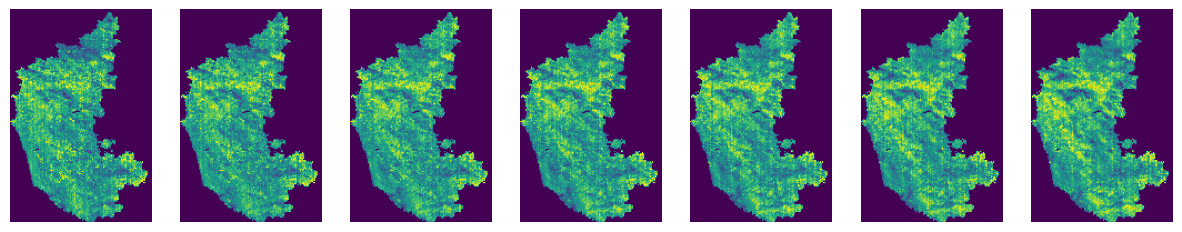

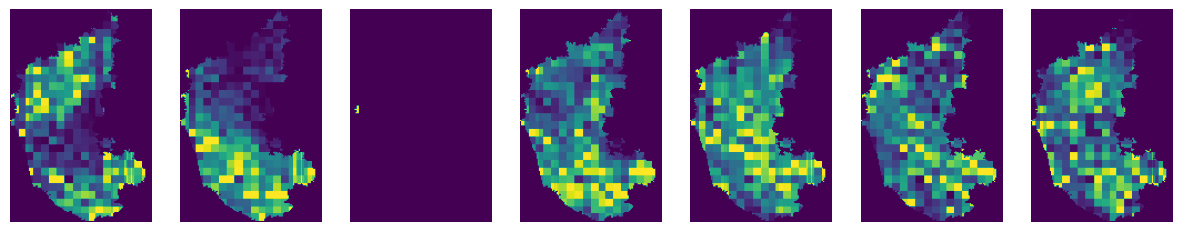

In [5]:
from matplotlib import pyplot
idx = np.random.randint(0, len(dataset[0]),7)
plt.figure(figsize=(15,15))
for i in range(len(idx)):
    #define subplot
    pyplot.subplot(1,7,1+i)
    #turn off acis
    pyplot.axis('off')
    #plot raw pixel data
    pyplot.imshow(dataset[0][i].reshape(192,128))
    #show title
    #pyplot.title(titles[i])
pyplot.show()
plt.figure(figsize=(15,15))
for i in range(len(idx)):
    #define subplot
    pyplot.subplot(1,7,1+i)
    #turn off acis
    pyplot.axis('off')
    #plot raw pixel data
    pyplot.imshow(rf_dataset[0][i].reshape(192,128))
    #show title
    #pyplot.title(titles[i])
pyplot.show()

In [66]:
test_dataset[:106].shape

(106, 192, 128, 1)

In [6]:
rf_vhi_train = np.concatenate((train_dataset, rf_train_dataset),axis=3)
print(rf_vhi_train.shape)
rf_vhi_test = np.concatenate((test_dataset[:106], rf_test_dataset), axis = 3)
print(rf_vhi_test.shape)

(1999, 192, 128, 2)
(106, 192, 128, 2)


In [48]:
a = [2,3,4,5,6,78,5]
a[:2]

[2, 3]

# Sampling temporally

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, lab_sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence        
        # if end_ix > len(sequence)-1:
        #     break
        if end_ix == 1999:
            seq_x, seq_y = sequence[i], test_dataset[0]
        elif end_ix == 2000:
            seq_x, seq_y = sequence[i], test_dataset[1]
        elif end_ix == 2001:
            seq_x, seq_y = sequence[i], test_dataset[2]
        else:
            seq_x, seq_y = sequence[i], lab_sequence[end_ix]
        # gather input and output parts of the pattern
        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y), n_steps

In [8]:
X_train, y_train, n_steps = split_sequence(rf_vhi_train, train_dataset,2)
print(X_train.shape, y_train.shape)
X_train_flattened = X_train.reshape(1999,49152)
y_train_flattened = y_train.reshape(1999,24576)
print(X_train_flattened.shape, y_train_flattened.shape)

(1999, 192, 128, 2) (1999, 192, 128, 1)
(1999, 49152) (1999, 24576)


In [9]:
def split_sequence(sequence, lab_sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence        
        # if end_ix > len(sequence)-1:
        #     break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i], lab_sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y), n_steps

In [38]:
X_test, y_test, n_steps = split_sequence(rf_vhi_test, test_dataset,2)
print(X_test.shape, y_test.shape)
X_test_flattened = X_test.reshape(106, 49152)
y_test_flattened = y_test.reshape(106,24576)
print(X_test_flattened.shape, y_test_flattened.shape)

(106, 192, 128, 2) (106, 192, 128, 1)
(106, 49152) (106, 24576)


In [39]:
# Fitting Multiple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train_flattened, y_train_flattened)

LinearRegression()

In [40]:
#Predicting the Test set result 
y_pred = regressor.predict(X_test_flattened)
print(y_pred.shape)

(106, 24576)


In [41]:
from sklearn.metrics import mean_squared_error 
print("The Mean Squared Error is: {}".format(mean_squared_error(y_test_flattened, y_pred)))

The Mean Squared Error is: 0.01488215196877718


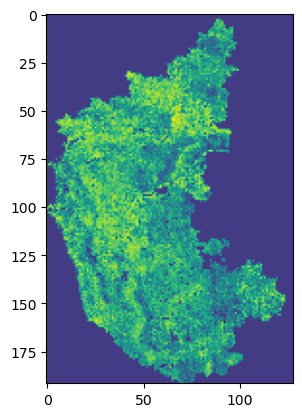

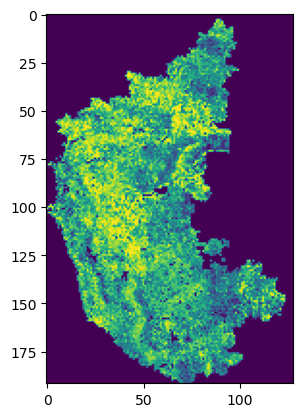

In [76]:
img = y_pred[0].reshape(192,128)
y_real = y_test_flattened[0].reshape(192,128)
plt.imshow(img)
plt.show()
plt.imshow(y_real)

In [93]:
len(X_test_flattened[2:])

104

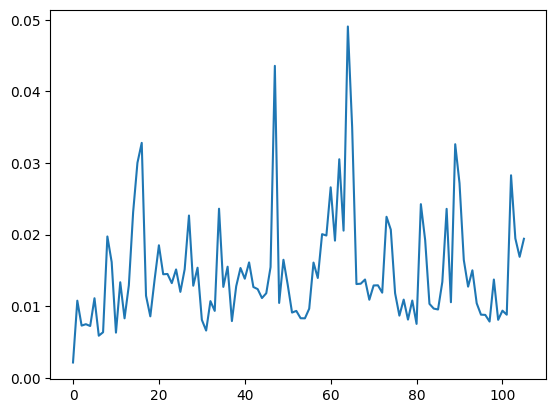

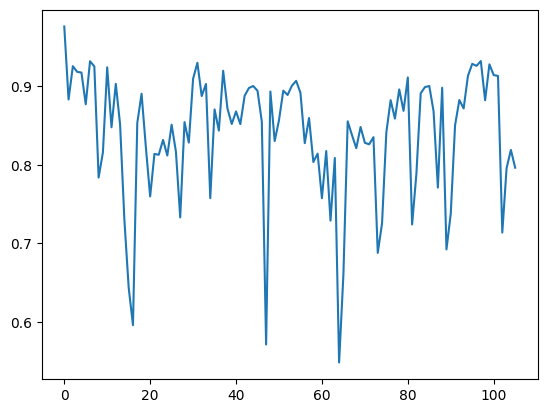

In [42]:
MSE_LR =[]
R2_LR = []
for i in range(len(X_test_flattened)):
    pred = y_pred[i].reshape(192,128)
    yreal = y_test_flattened[i].reshape(192,128)
    #r2 = r2_score(yreal,pred)
    err = mse(yreal,pred)
    r2 = r2_score(yreal,pred)
    #yhat.append(pred)
    #R2.append(r2)
    MSE_LR.append(err)
    R2_LR.append(r2)
# print(MSE_LR)
#np.save("F:\Jyoti Shukla -MS\codes\AVHRR codes/R2_score_LR.npy", R2)
#np.save("MSE_for_LR.npy", MSE_LR)
plt.plot(MSE_LR)
plt.show()
plt.plot(R2_LR)

In [98]:
np.max(R2_LR)

0.9759455275220656

In [95]:
print(MSE_LR)

[0.0021311862, 0.0107619995, 0.007280168, 0.0074775373, 0.0072283056, 0.011103656, 0.00587089, 0.006357145, 0.01974057, 0.016165541, 0.0063023996, 0.013340602, 0.0083014555, 0.012907485, 0.023143068, 0.030028827, 0.0328196, 0.011454677, 0.008577745, 0.013712527, 0.018499378, 0.01445307, 0.014494162, 0.013221696, 0.015129274, 0.011993922, 0.01515316, 0.02266218, 0.012858203, 0.015369833, 0.0080900695, 0.006591898, 0.010704255, 0.009338003, 0.02361218, 0.012691565, 0.015513706, 0.007917893, 0.012784685, 0.015327911, 0.013835529, 0.01611241, 0.0126765855, 0.012380892, 0.011133224, 0.011802756, 0.015457641, 0.04357452, 0.010450616, 0.01648181, 0.012977757, 0.009104418, 0.009334862, 0.008314592, 0.008298644, 0.009646492, 0.016091567, 0.013933875, 0.020060439, 0.019871192, 0.02660529, 0.019152392, 0.030527769, 0.02055151, 0.049065314, 0.035007317, 0.013084485, 0.013132809, 0.01372285, 0.01089946, 0.012888698, 0.012911761, 0.01188752, 0.022496756, 0.020682655, 0.0118080415, 0.008676349, 0.010

In [43]:
print(R2_LR)

[0.9759439867267797, 0.883027181220881, 0.9254434480784521, 0.9181827918090938, 0.9173171553810362, 0.8769431334775465, 0.9316781644906283, 0.9252419839391569, 0.7836890100425515, 0.8158297888735359, 0.923973502420439, 0.8476789632001898, 0.9029065648014103, 0.8511502652514891, 0.7298605354592731, 0.6435702665316883, 0.5958763852370682, 0.85309579809885, 0.890333173855409, 0.8224005758319486, 0.7596850920561824, 0.8138367987413, 0.8126710666655188, 0.8315756104947998, 0.8117245326125095, 0.8509617277711534, 0.8166291094329812, 0.7329754549475607, 0.8542757072191778, 0.8282071559440622, 0.9093951665536154, 0.9297470076706126, 0.8873978535305562, 0.902818620161409, 0.7574951917021235, 0.8704144579259564, 0.8434419023175959, 0.9196278482663205, 0.8715812531315491, 0.8518823650657761, 0.8678093318260905, 0.851701881383816, 0.8877512855173201, 0.8976777315209037, 0.9001591987871763, 0.8941745519533516, 0.8547767315759489, 0.5712929317074578, 0.8931779335504292, 0.8301564797789004, 0.8566412

In [45]:
np.mean(MSE_LR)

0.014882152

In [44]:
np.mean(R2_LR)

0.8399936832901164

In [166]:
a= [[1,2],[2,3]]
b = [[2,3],[1,4]]
c = []
c.append(a)
c.append(b)
c.append([[1,2],[10,19]])
c

[[[1, 2], [2, 3]], [[2, 3], [1, 4]], [[1, 2], [10, 19]]]

## ConvLSTM + Conv3D Model

Data Preparing

In [188]:
test_dataset[0:2].shape

(2, 192, 128, 1)

In [10]:
# split a univariate sequence into samples
def split_sequence(sequence, lab_sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence        
        if end_ix > len(sequence)-2:
            print(i)
            break
        # if end_ix == 1998:
        #     seq_x, seq_y = sequence[i:end_ix], lab_sequence[1998:]
        # if end_ix == 1999:
        #     seq_x, seq_y = sequence[i:end_ix], test_dataset[0:2]
        # elif end_ix == 2000:
        #     seq_x, seq_y = sequence[i:end_ix], test_dataset[1:3]
        # elif end_ix == 2001:
        #     seq_x, seq_y = sequence[i:end_ix], test_dataset[2:4]
        #else:
        
        seq_x, seq_y = sequence[i:end_ix], lab_sequence[i+2:end_ix+2]
        # gather input and output parts of the pattern
        
        X.append(seq_x)
        y.append(seq_y)
    X.append(sequence[1997:1999])
    y.append(test_dataset[0:2])
    return np.array(X), np.array(y), n_steps

In [11]:
X_train, y_train, n_steps = split_sequence(rf_vhi_train, train_dataset,2)
print(X_train.shape, y_train.shape)
# X_train_flattened = X_train.reshape(1999,49152)
# y_train_flattened = y_train.reshape(1999,24576)
# print(X_train_flattened.shape, y_train_flattened.shape)


1996
(1997, 2, 192, 128, 2) (1997, 2, 192, 128, 1)


In [12]:
# split a univariate sequence into samples
def split_sequence(sequence, lab_sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence        
        if end_ix > len(sequence)-2:
            break
        seq_x, seq_y = sequence[i:end_ix], lab_sequence[i+2:end_ix+2]
        # gather input and output parts of the pattern        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y), n_steps

In [13]:
X_test, y_test, n_steps = split_sequence(rf_vhi_test, test_dataset,2)
print(X_test.shape, y_test.shape)

(103, 2, 192, 128, 2) (103, 2, 192, 128, 1)


ConvLSTM_Conv3D_Model

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History 
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ConvLSTM2D, Flatten, Dropout, MaxPooling2D,MaxPooling3D, TimeDistributed, Conv2D, LSTM, SimpleRNN, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
inp = layers.Input(shape=(None, *X_train.shape[2:]))
inp.shape

TensorShape([None, None, 192, 128, 2])

In [17]:
x = layers.ConvLSTM2D(
    filters=8,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
#x = layers.BatchNormalization()(x)
x = tfa.layers.GroupNormalization(groups =8)(x)
#x = layers.MaxPooling3D((2, 2, 2), padding='same')(x)
x = layers.ConvLSTM2D(
    filters=32,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
#x = layers.BatchNormalization()(x)
x = tfa.layers.GroupNormalization(groups =16)(x)
#x = layers.MaxPooling3D((2, 2, 2), padding='same')(x)
x = layers.Dropout(0.3)(x)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
#x = layers.BatchNormalization()(x)
x = tfa.layers.GroupNormalization(groups =64)(x)
# #x = layers.Dropout(0.3)(x)
# #x = layers.UpSampling3D((2, 2,2))(x)

# x = layers.ConvLSTM2D(
#     filters=64,
#     kernel_size=(3, 3),
#     padding="same",
#     return_sequences=True,
#     activation="relu",
# )(x)
# x = tfa.layers.GroupNormalization(groups =64)(x)
# #x = layers.BatchNormalization()(x)

# # x = layers.ConvLSTM2D(
# #     filters=256,
# #     kernel_size=(3, 3),
# #     padding="same",
# #     return_sequences=True,
# #     activation="relu",
# # )(x)
# # x = tfa.layers.GroupNormalization(groups =64)(x)

x = layers.ConvLSTM2D(
    filters=32,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)

x = tfa.layers.GroupNormalization(groups =16)(x)
# #x = layers.UpSampling3D((2, 2, 2))(x)
# # x = layers.Dropout(0.3)(x)
x = layers.ConvLSTM2D(
    filters=8,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = tfa.layers.GroupNormalization(groups =8)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
huber_loss = tf.keras.losses.Huber(delta=0.3)
# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss= huber_loss, optimizer=keras.optimizers.SGD(learning_rate=0.15),metrics=[tf.keras.metrics.mse]
)
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 192, 128, 2 0         
_________________________________________________________________
conv_lst_m2d (ConvLSTM2D)    (None, None, 192, 128, 8) 2912      
_________________________________________________________________
group_normalization (GroupNo (None, None, 192, 128, 8) 16        
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 192, 128, 32 46208     
_________________________________________________________________
group_normalization_1 (Group (None, None, 192, 128, 32 64        
_________________________________________________________________
dropout (Dropout)            (None, None, 192, 128, 32 0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 192, 128, 64 221440

In [18]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 40
batch_size = 1

# Fit the model to the training data.
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
)

model.save("F:\Jyoti Shukla -MS\codes\Saved_models_and_model_history_rf_vhi/convlstm_conv3d_rf_AVHRR_model_11_1.h5")

# # Results of updated model
np.save('F:\Jyoti Shukla -MS\codes\Saved_models_and_model_history_rf_vhi/convlstm_conv3d_rf_AVHRR_model_history_11_1.npy',history.history)

Epoch 1/40
1997/1997 [==============================] - 202s 93ms/step - loss: 0.0052 - mean_squared_error: 0.0107 - val_loss: 0.0040 - val_mean_squared_error: 0.0080
Epoch 2/40
1997/1997 [==============================] - 183s 92ms/step - loss: 0.0031 - mean_squared_error: 0.0063 - val_loss: 0.0029 - val_mean_squared_error: 0.0059
Epoch 3/40
1997/1997 [==============================] - 183s 91ms/step - loss: 0.0027 - mean_squared_error: 0.0055 - val_loss: 0.0026 - val_mean_squared_error: 0.0053
Epoch 4/40
1997/1997 [==============================] - 183s 92ms/step - loss: 0.0025 - mean_squared_error: 0.0051 - val_loss: 0.0027 - val_mean_squared_error: 0.0053
Epoch 5/40
1997/1997 [==============================] - 177s 89ms/step - loss: 0.0024 - mean_squared_error: 0.0049 - val_loss: 0.0024 - val_mean_squared_error: 0.0047
Epoch 6/40
1997/1997 [==============================] - 177s 88ms/step - loss: 0.0023 - mean_squared_error: 0.0047 - val_loss: 0.0023 - val_mean_squared_error: 0.004

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History 
from tensorflow import keras
import tensorflow_addons as tfa
model= load_model("F:\Jyoti Shukla -MS\codes\Saved_models_and_model_history_rf_vhi/convlstm_conv3d_rf_AVHRR_model_11_1.h5")
history=np.load('F:\Jyoti Shukla -MS\codes\Saved_models_and_model_history_rf_vhi/convlstm_conv3d_rf_AVHRR_model_history_11_1.npy',allow_pickle='TRUE').item()
history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error', 'lr'])

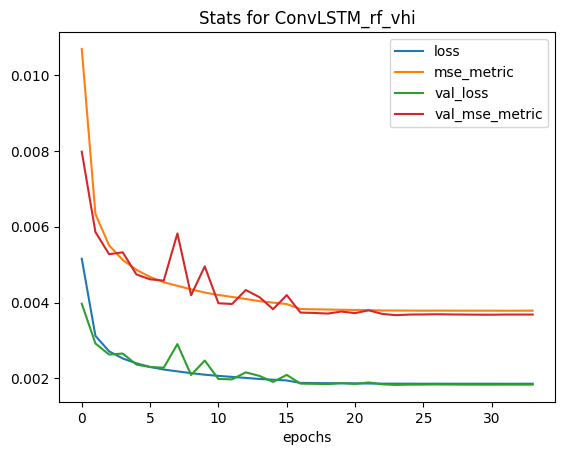

In [20]:
# Results of updated model

plt.plot(history['loss'])
plt.plot(history['mean_squared_error'])
plt.plot(history['val_loss'])
plt.plot(history['val_mean_squared_error'])

plt.title('Stats for ConvLSTM_rf_vhi')
plt.xlabel('epochs')
plt.legend(['loss','mse_metric','val_loss','val_mse_metric'])
plt.show()

mse 0.013556884
r2 score is: 0.80925908447751 

discrete values, predicted and real respectively: 0.92965996 1.0


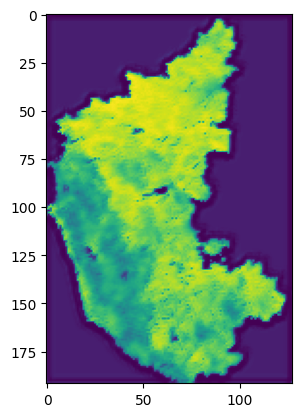

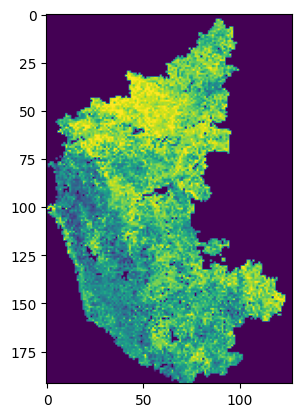

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
framed = X_test[36][0:1,...]
pred = model.predict(np.expand_dims(framed, axis=0))
y_real = y_test[36][0]
pred = pred.reshape(192,128,1)
plt.imshow(pred.reshape(192,128))
plt.figure()
plt.imshow(y_real.reshape(192,128))
r2 = r2_score(y_real.reshape(192,128),pred.reshape(192,128))
mse = mse(y_real.reshape(192,128),pred.reshape(192,128))
print("mse",mse)
print("r2 score is:", r2,"\n")
pred = pred.reshape(192,128)
y_real = y_real.reshape(192,128)
print("discrete values, predicted and real respectively:",(pred.reshape(192,128))[50][30],(y_real.reshape(192,128))[50][30])

In [29]:
X_test[0][0].shape

(192, 128, 2)

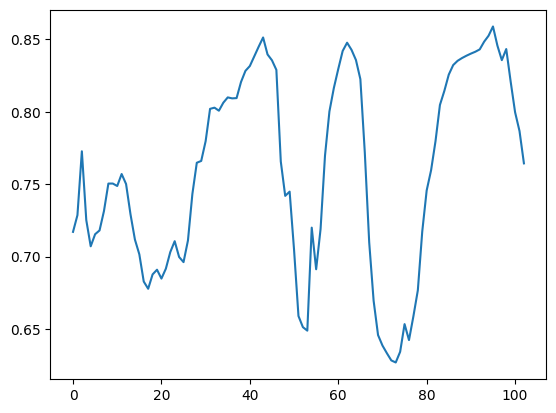

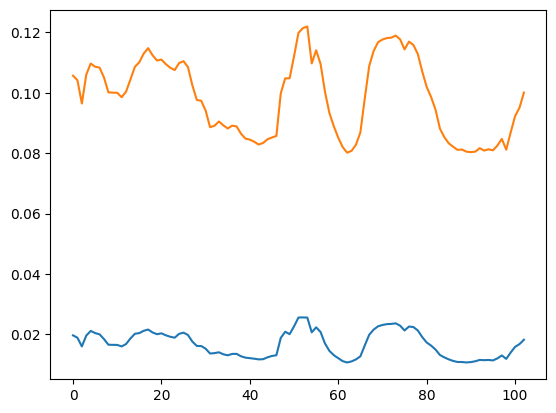

In [22]:
from sklearn.metrics import mean_squared_error as mse
data = X_test
label = y_test
predicted =[]
true = []
R2 =[]
res = []
MSE =[]
for i in range(len(data)):
    #for j in range(4):
    framed = data[i][0]
    y_real = label[i][0].reshape(192,128)
    test = framed.reshape(1,1,192,128,2)
    pred = model.predict(test)
    pred = pred.reshape(192,128)
    r2 = r2_score(y_real,pred)
    residual = mae(y_real,pred)
    err = mse(y_real,pred.reshape(192,128))
    MSE.append(err)
    res.append(residual)
    predicted.append(pred)
    true.append(y_real)
    R2.append(r2)
plt.plot(R2)
plt.show()
plt.plot(MSE)
plt.show
plt.plot(res)
# np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes\convlstm_conv3d_output/r2_score_convlstm_conv3d_9_rf_vhi.npy", R2)
# np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes\convlstm_conv3d_output/mse_convlstm_conv3d_9_rf_vhi.npy", MSE)
# np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes\convlstm_conv3d_output/mae_convlstm_conv3d_9_rf_vhi.npy", res)
# np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes\convlstm_conv3d_output/predicted_convlstm_conv3d_9_rf_vhi.npy", predicted)


In [23]:
np.mean(R2), np.max(R2),np.mean(MSE), np.mean(res)

(0.7590318830700183, 0.8588835088539524, 0.016814936, 0.09838963)

# ConvLSTM +Conv2D

In [78]:
# split a univariate sequence into samples
def split_sequence(sequence, lab_sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence        
        if end_ix > len(sequence)-3:
            #print(i)
            break
        # if end_ix == 1998:
        #     seq_x, seq_y = sequence[i:end_ix], lab_sequence[1998:]
        # if end_ix == 1999:
        #     seq_x, seq_y = sequence[i:end_ix], test_dataset[0:2]
        # elif end_ix == 2000:
        #     seq_x, seq_y = sequence[i:end_ix], test_dataset[1:3]
        # elif end_ix == 2001:
        #     seq_x, seq_y = sequence[i:end_ix], test_dataset[2:4]
        #else:
        # if end_ix+2 >= 1999:
        #     break
        # else:
        seq_x, seq_y = sequence[i:end_ix], lab_sequence[end_ix+2]
        # gather input and output parts of the pattern
        
        X.append(seq_x)
        y.append(seq_y)
    # X.append(sequence[1997:1999])
    # y.append(test_dataset[0:2])
    return np.array(X), np.array(y), n_steps

In [57]:
train_dataset[0].shape

(192, 128, 1)

In [79]:
X_train, y_train, n_steps = split_sequence(rf_vhi_train, train_dataset,2)
print(X_train.shape, y_train.shape)
# X_train_flattened = X_train.reshape(1999,49152)
# y_train_flattened = y_train.reshape(1999,24576)
# print(X_train_flattened.shape, y_train_flattened.shape)


(1995, 2, 192, 128, 2) (1995, 192, 128, 1)


In [80]:
# split a univariate sequence into samples
def split_sequence(sequence, lab_sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence        
        if end_ix > len(sequence)-2:
            break
        seq_x, seq_y = sequence[i:end_ix], lab_sequence[end_ix+2]
        # gather input and output parts of the pattern        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y), n_steps

In [81]:
X_test, y_test, n_steps = split_sequence(rf_vhi_test, test_dataset,2)
print(X_test.shape, y_test.shape)

(103, 2, 192, 128, 2) (103, 192, 128, 1)


In [93]:
import tensorflow_addons as tfa

In [16]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *X_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=8,
    kernel_size=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
#x = layers.MaxPooling3D((2, 2, 2), padding='same')(x)
x = layers.ConvLSTM2D(
    filters=16,
    kernel_size=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
#x = layers.MaxPooling3D((2, 2, 2), padding='same')(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(2, 2),
    padding="same",
    return_sequences=False,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
#x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(
    filters=8,
    kernel_size=(2, 2),
    padding="same",
    activation="relu",
)(x)
# x = layers.BatchNormalization()(x)
# #x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(
#     filters=32,
#     kernel_size=(3, 3),
#     padding="same",
#     activation="relu",
# )(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(
    filters=1,
    kernel_size=(2, 2),
    padding="same",
    activation="relu",
)(x)
# x = layers.Conv3D(
#     filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
# )(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss='mae', optimizer='sgd',metrics=[tf.keras.metrics.mse]
)
model.summary()

NameError: name 'X_train' is not defined

In [95]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 50
batch_size = 2

# Fit the model to the training data.
history= model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/convlstm+conv2d_history_rf_vhi.npy", history.history)
model.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/convlstm+conv2d_model_rf_vhi.h5")

Epoch 1/50
998/998 [==============================] - 152s 145ms/step - loss: 0.1304 - mean_squared_error: 0.0616 - val_loss: 0.0856 - val_mean_squared_error: 0.0251
Epoch 2/50
998/998 [==============================] - 143s 144ms/step - loss: 0.0764 - mean_squared_error: 0.0198 - val_loss: 0.0688 - val_mean_squared_error: 0.0158
Epoch 3/50
998/998 [==============================] - 144s 145ms/step - loss: 0.0677 - mean_squared_error: 0.0155 - val_loss: 0.0609 - val_mean_squared_error: 0.0119
Epoch 4/50
998/998 [==============================] - 147s 148ms/step - loss: 0.0640 - mean_squared_error: 0.0138 - val_loss: 0.0579 - val_mean_squared_error: 0.0108
Epoch 5/50
998/998 [==============================] - 148s 149ms/step - loss: 0.0616 - mean_squared_error: 0.0127 - val_loss: 0.0570 - val_mean_squared_error: 0.0103
Epoch 6/50
998/998 [==============================] - 149s 149ms/step - loss: 0.0599 - mean_squared_error: 0.0119 - val_loss: 0.0541 - val_mean_squared_error: 0.0092
Epoc

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History 
from tensorflow import keras
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt
model_conv2 = load_model("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/convlstm+conv2d_model_rf_vhi.h5")
history_conv2 = np.load("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/convlstm+conv2d_history_rf_vhi.npy",allow_pickle=True).item()
history_conv2.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error', 'lr'])

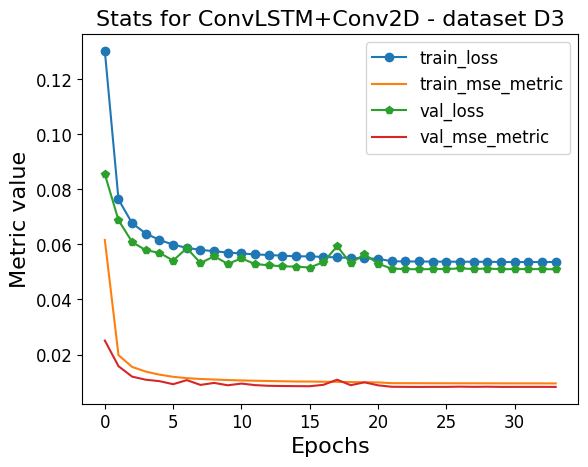

In [12]:
# Results of updated model6

plt.plot(history_conv2['loss'],'-o')
plt.plot(history_conv2['mean_squared_error'])
plt.plot(history_conv2['val_loss'],'-p')
plt.plot(history_conv2['val_mean_squared_error'])

plt.title('Stats for ConvLSTM+Conv2D - dataset D3', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Metric value', fontsize=16)
plt.legend(['train_loss','train_mse_metric','val_loss','val_mse_metric'], fontsize=12)
plt.show()

0.9164007388293854


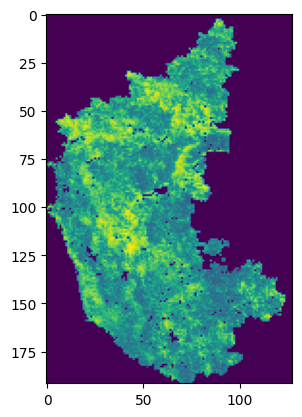

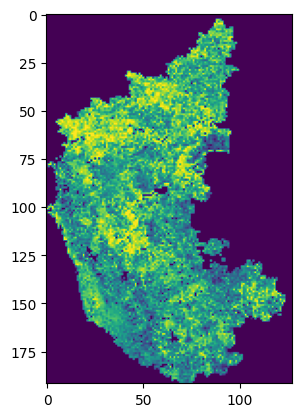

In [98]:
model = model_conv2
from sklearn.metrics import r2_score
framed = X_test[4][1:2,...]
pred = model.predict(np.expand_dims(framed, axis=0))
y_real = y_test[4].reshape(192,128)
pred = pred.reshape(192,128)
r2 = r2_score(y_real,pred)
print(r2)
plt.imshow(pred.reshape(192,128))
plt.figure()
plt.imshow(y_real.reshape(192,128))

In [ ]:
unscale_pred = unscale(pred,vhi_test_label[4])
unscale_real = unscale(y_real,vhi_test_label[4])
colorcoded_pred = colorcoding(unscale_pred)
colorcoded_real = colorcoding(unscale_real)
images = [colorcoded_real, colorcoded_pred]
titles =["Real","Predicted"]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for i in range(len(images)):
    pos = ax[i].imshow(images[i].reshape(192,128), cmap="rainbow")
    #ax.set_title(f"Original Frame {idx}")
    cax = fig.add_axes([ax[i].get_position().x1+0.01,ax[i].get_position().y0,0.02,ax[i].get_position().height])
    fig.colorbar(pos, ax = ax[i], cax =cax)
    ax[i].set_title(titles[i])
    #ax.axis("off")
fig.suptitle("ConvLSTM+Conv2D Outputs")

In [89]:
label[0].shape

(192, 128, 1)

In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
data = X_test
label = y_test
predicted_mod =[]
true = []
R2_mod =[]
res_mod = []
mse_mod =[]
for i in range(len(data)):
    #for j in range(4):
    framed = data[i][0]
    y_real = label[i].reshape(192,128)
    test = framed.reshape(1,1,192,128,2)
    pred = model.predict(test)
    pred = pred.reshape(192,128)
    r2 = r2_score(y_real,pred)
    residual = mae(y_real,pred)
    res_mod.append(residual)
    err = mse(y_real,pred)
    mse_mod.append(err)
    predicted_mod.append(pred)
    true.append(y_real)
    R2_mod.append(r2)
        
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/R2_score_convLSTM+conv2D_rf_vhi.npy", R2_mod)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/MAE_for_ConvLSTM+ Conv2D_rf_vhi.npy",res_mod)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/MSE_for_ConvLSTM+Conv2D_rf_vhi.npy",mse_mod)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/Predicted_outputs_ConvLSTM+Conv2D_rf_vhi.npy", predicted_mod)
# r2 = r2_score(y_real, pred)
print(len(R2_mod))
print('r2 score for test data on model is: \n', R2_mod)

103
r2 score for test data on model is: 
 [0.9001795894958953, 0.9000192412404888, 0.8892715868899002, 0.8897279412722199, 0.9050717290119552, 0.9046547194651, 0.9087970569436625, 0.9011912925623724, 0.8916392383180254, 0.8844034042904091, 0.8776688675716652, 0.8678159253054896, 0.8653121347679469, 0.8657281825379822, 0.8740757750502537, 0.8762529247379538, 0.8842309505916377, 0.8839158106042064, 0.8771921228863185, 0.8656045612199863, 0.8706246234290258, 0.8713808397397403, 0.8676070768561004, 0.8625981450813882, 0.8606023596594985, 0.8645676467902756, 0.8704433471791031, 0.8736948803817041, 0.8783959340379724, 0.8891076202848824, 0.8972134267312348, 0.8990333382394977, 0.9068175902473352, 0.912236267371245, 0.9028840817829373, 0.9079318806860427, 0.9115712543085973, 0.9019139344232969, 0.9025854794311242, 0.8881220206699479, 0.8819205727351386, 0.8691371611810443, 0.8867215568994595, 0.8974549378356707, 0.8958621902550464, 0.8686657231358195, 0.8776757444489821, 0.8747891997662052, 0

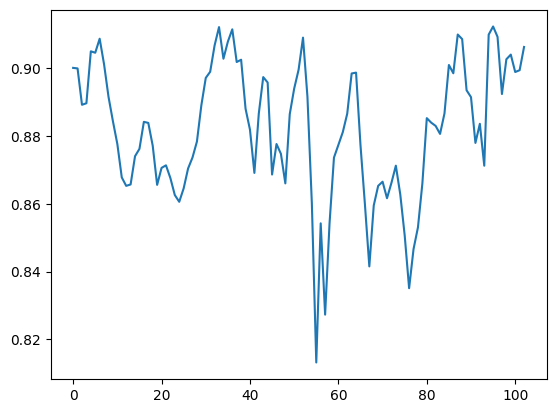

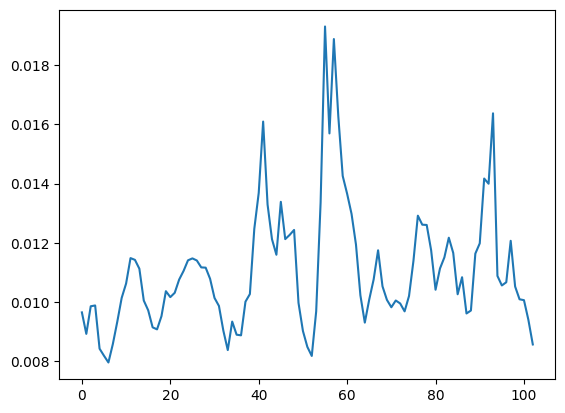

In [101]:
plt.plot(R2_mod)
plt.show()
plt.plot(mse_mod)

In [100]:
np.mean(R2_mod), np.max(R2_mod), np.mean(res_mod), np.mean(mse_mod)

(0.8820581497390221, 0.9124137138370378, 0.059144236, 0.011079382)

# Conv3D

In [13]:
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense, LSTM
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
# from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
# import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py


In [39]:
## input layer
input_layer = Input(shape=(None, *X_train.shape[2:]))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 3), activation='relu',padding="same")(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu',padding="same")(conv_layer1)

conv_drop = Dropout(0.3)(conv_layer2)
## add max pooling to obtain the most imformatic features
#pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)
conv_layer3 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu',padding="same")(conv_drop)
conv_layer4 = Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu',padding="same")(conv_layer3)
conv_layer5 = Conv3D(filters=1, kernel_size=(3, 3, 3), activation='sigmoid',padding="same")(conv_layer4)
# pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)
# out= LSTM(4)(conv_layer4)

# ## perform batch normalization on the convolution outputs before feeding it to MLP architecture
# pooling_layer2 = BatchNormalization()(pooling_layer2)
# flatten_layer = Flatten()(pooling_layer2)

# ## create an MLP architecture with dense layers : 4096 -> 512 -> 10
# ## add dropouts to avoid overfitting / perform regularization
# dense_layer1 = Dense(units=2048, activation='relu')(flatten_layer)
# dense_layer1 = Dropout(0.4)(dense_layer1)
# dense_layer2 = Dense(units=512, activation='relu')(dense_layer1)
# dense_layer2 = Dropout(0.4)(dense_layer2)
# output_layer = Dense(units=10, activation='softmax')(dense_layer2)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=conv_layer5)
model.compile(loss='mse', optimizer='sgd', metrics=[tf.keras.metrics.mse])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 192, 128, 2 0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, None, 192, 128, 8) 440       
_________________________________________________________________
conv3d_5 (Conv3D)            (None, None, 192, 128, 16 3472      
_________________________________________________________________
dropout (Dropout)            (None, None, 192, 128, 16 0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, None, 192, 128, 64 27712     
_________________________________________________________________
conv3d_7 (Conv3D)            (None, None, 192, 128, 16 27664     
_________________________________________________________________
conv3d_8 (Conv3D)            (None, None, 192, 128, 1) 433 

In [40]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 50
batch_size = 1

# Fit the model to the training data.
history= model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/conv3D_history_rf_vhi.npy", history.history)
model.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/conv3D_model_rf_vhi.h5")

Epoch 1/50
1997/1997 [==============================] - 33s 16ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 2/50
1997/1997 [==============================] - 33s 16ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 3/50
1997/1997 [==============================] - 32s 16ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 4/50
1997/1997 [==============================] - 32s 16ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 5/50
1997/1997 [==============================] - 32s 16ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 6/50
1997/1997 [==============================] - 33s 16ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoc

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History 
from tensorflow import keras
import tensorflow_addons as tfa
model_conv3 = load_model("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/conv3D_model_rf_vhi.h5")
history_conv3 = np.load("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/conv3D_history_rf_vhi.npy",allow_pickle=True).item()
history_conv3.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error', 'lr'])

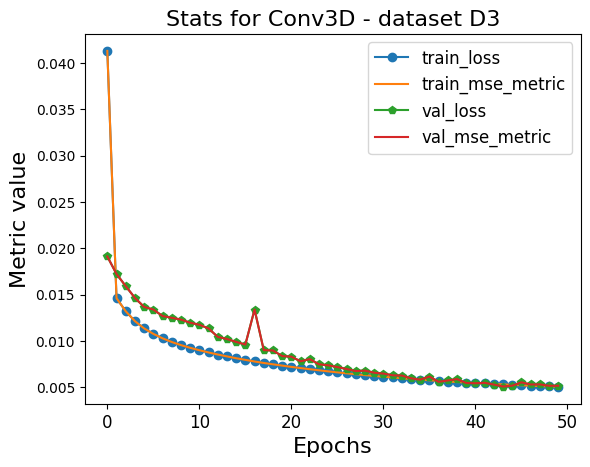

In [15]:
# Results of updated model6

plt.plot(history_conv3['loss'],'-o')
plt.plot(history_conv3['mean_squared_error'])
plt.plot(history_conv3['val_loss'],'-p')
plt.plot(history_conv3['val_mean_squared_error'])

plt.title('Stats for Conv3D - dataset D3', fontsize=16)
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Metric value', fontsize=16)
plt.legend(['train_loss','train_mse_metric','val_loss','val_mse_metric'], fontsize=12)
plt.show()

mse 0.029368106
r2 score is: 0.6296846444098396 

discrete values, predicted and real respectively: 0.6265906 1.0


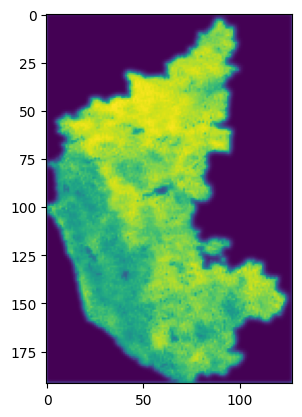

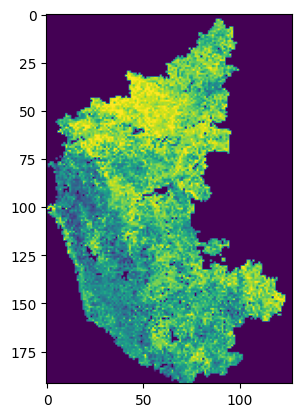

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
framed = X_test[36][:1,...]
pred = model_conv3.predict(np.expand_dims(framed, axis=0))
y_real = y_test[36][0]
pred = pred.reshape(192,128,1)
plt.imshow(pred.reshape(192,128))
plt.figure()
plt.imshow(y_real.reshape(192,128))
r2 = r2_score(y_real.reshape(192,128),pred.reshape(192,128))
mse = mse(y_real.reshape(192,128),pred.reshape(192,128))
print("mse",mse)
print("r2 score is:", r2,"\n")
pred = pred.reshape(192,128)
y_real = y_real.reshape(192,128)
print("discrete values, predicted and real respectively:",(pred.reshape(192,128))[50][30],(y_real.reshape(192,128))[50][30])

In [31]:
unscale_pred = unscale(pred,vhi_test_label[36][0])
unscale_real = unscale(y_real,vhi_test_label[36][0])
colorcoded_pred = colorcoding(unscale_pred)
colorcoded_real = colorcoding(unscale_real)
images = [colorcoded_real, colorcoded_pred]
titles =["Real","Predicted"]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for i in range(len(images)):
    pos = ax[i].imshow(images[i].reshape(192,128), cmap="rainbow")
    #ax.set_title(f"Original Frame {idx}")
    cax = fig.add_axes([ax[i].get_position().x1+0.01,ax[i].get_position().y0,0.02,ax[i].get_position().height])
    fig.colorbar(pos, ax = ax[i], cax =cax)
    ax[i].set_title(titles[i])
    #ax.axis("off")
fig.suptitle("Conv3D Outputs")

NameError: name 'unscale' is not defined

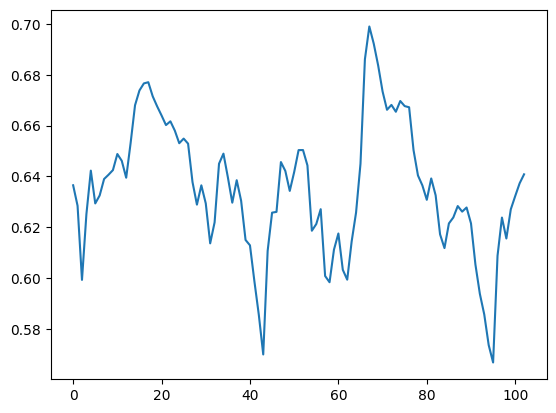

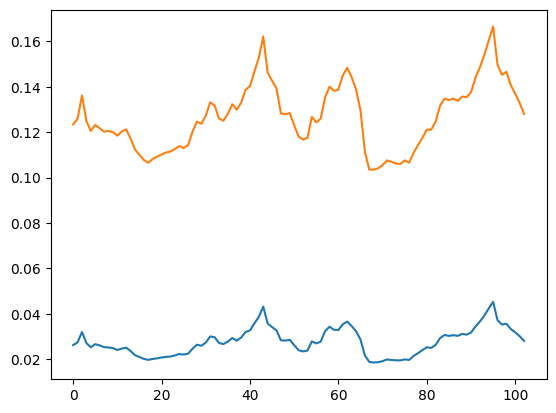

In [108]:
from sklearn.metrics import mean_squared_error as mse
data = X_test
label = y_test
predicted =[]
true = []
R2 =[]
res = []
MSE =[]
for i in range(len(data)):
    #for j in range(4):
    framed = data[i][0]
    y_real = label[i][0].reshape(192,128)
    test = framed.reshape(1,1,192,128,2)
    pred = model_conv3.predict(test)
    pred = pred.reshape(192,128)
    r2 = r2_score(y_real,pred)
    residual = mae(y_real,pred)
    err = mse(y_real,pred.reshape(192,128))
    MSE.append(err)
    res.append(residual)
    predicted.append(pred)
    true.append(y_real)
    R2.append(r2)
plt.plot(R2)
plt.show()
plt.plot(MSE)
plt.show
plt.plot(res)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/r2_score_conv3d_rf_vhi.npy", R2)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/mse_conv3d_rf_vhi.npy", MSE)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/mae_conv3d_rf_vhi.npy", res)
np.save("E:\Jyoti Shukla - MS\codes\RF_VHI_codes/predicted_conv3d_rf_vhi.npy", predicted)


In [45]:
np.mean(R2), np.max(R2), np.mean(MSE), np.mean(res)

(0.6353249594974506, 0.69897823450565, 0.02775715, 0.1268076)